<a href="https://colab.research.google.com/github/felixzhao/stat501-project/blob/main/notebooks/V7_1_FZ_PCA_all_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This version based on un-normalize data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1"

Mounted at /content/drive
 01_selected_data.csv			 05_preprocessed_full_raw_data.csv
 02_almost_complete_data.csv		 05_preprocessed_full_raw_data.gsheet
 02_almost_complete_data.gsheet		 citi_agg_start_end_reg.csv
 03_full_data.csv			 citi_agg_texts.csv
 03_full_data.gsheet			 citi_agg_texts.gsheet
'04_preprocessed_full_data (1).gsheet'	 Clustering
'04_preprocessed_full_data (2).gsheet'	'Clustering pdf.gdoc'
 04_preprocessed_full_data.csv		 start_end_registrations.csv
 04_preprocessed_full_data.gsheet	 start_end_registrations_wide.csv


# load df

In [3]:
raw_path = '/content/drive/My Drive/Study@NZ/VUW@NZ/STATS 501/Project/pre_process_round_1/05_preprocessed_full_raw_data.csv'

In [4]:
df = pd.read_csv(raw_path, low_memory=False, index_col=False)

## info

In [5]:
print(len(df.columns))
df.columns

56


Index(['citizenId', 'hadAdvisory', 'age', 'citizenHeight', 'diabetes',
       'stress', 'noIllnesses', 'activePrevious30Days', 'daysOnProgram',
       'receivedAdviceCount', 'advicesWithVideoPercent',
       'receivedMessageCount', 'sentMessageCount', 'hasEverHadActiveAgreement',
       'hasActiveAdvisory', 'hasEndedAdvisory', 'hasEverHadWeightGoal',
       'hasEverHadActivityGoal', 'hasEverHadDietGoal', 'hasEverHadLifeGoal',
       'hasEverHadStepsGoal', 'goalsSet', 'advisorId', 'ALCOHOL',
       'BLOOD_PRESSURE', 'BLOOD_SUGAR', 'CIGARETTES', 'DIET_RULES', 'EXERCISE',
       'FASTING_BLOOD_SUGAR', 'LIFE_RULES', 'MEDICINE', 'MOOD', 'PAIN',
       'SLEEP', 'STEPS', 'WAIST_HIP', 'WEIGHT', 'count_intervention',
       'count_autogenerated', 'count_withvideo', 'min_messagetext_length',
       'avg_messagetext_length', 'max_messagetext_length', 'BMIClass_Normal',
       'BMIClass_Obesity 1', 'BMIClass_Obesity 2', 'BMIClass_Obesity 3',
       'BMIClass_Pre-obese', 'BMIClass_Underweight', 'cl

In [6]:
print(df.apply(lambda col: col.unique()))

citizenId                             [955397, 955420, 957973, 964298, 965126, 96324...
hadAdvisory                                                                      [1, 0]
age                                   [38, 33, 30, 73, 39, 67, 31, 32, 37, 46, 41, 4...
citizenHeight                         [175, 163, 156, 177, 166, 157, 164, 167, 169, ...
diabetes                                                                         [0, 1]
stress                                                                           [0, 1]
noIllnesses                                                                      [1, 0]
activePrevious30Days                                                             [0, 1]
daysOnProgram                         [17, 91, 81, 30, 201, 51, 197, 15, 386, 0, 29,...
receivedAdviceCount                   [8, 17, 21, 15, 19, 13, 35, 2, 36, 7, 16, 28, ...
advicesWithVideoPercent               [50, 53, 67, 33, 63, 54, 69, 100, 56, 29, 59, ...
receivedMessageCount            

In [7]:
df.describe(include='all')

,citizenId,hadAdvisory,age,citizenHeight,diabetes,stress,noIllnesses,activePrevious30Days,daysOnProgram,receivedAdviceCount,...,BMIClass_Obesity 2,BMIClass_Obesity 3,BMIClass_Pre-obese,BMIClass_Underweight,closeReason_COMPLETED,closeReason_INTERVENTION_COMPLETED,closeReason_OTHER,birth_MAYBE,birth_NO,birth_YES
count,3.670000e+02,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,9.784870e+05,0.980926,38.923706,164.743869,0.054496,0.016349,0.839237,0.196185,286.395095,28.076294,...,0.092643,0.054496,0.310627,0.002725,0.414169,0.002725,0.114441,0.068120,0.079019,0.722071
std,6.679062e+04,0.136970,8.623875,7.491329,0.227304,0.126986,0.367814,0.397652,184.548420,11.885366,...,0.290327,0.227304,0.463382,0.052200,0.493250,0.052200,0.318781,0.252295,0.270137,0.448590
min,8.103590e+05,0.000000,25.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.369740e+05,1.000000,35.000000,160.000000,0.000000,0.000000,1.000000,0.000000,107.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.865620e+05,1.000000,38.000000,165.000000,0.000000,0.000000,1.000000,0.000000,305.000000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.022040e+06,1.000000,40.000000,170.000000,0.000000,0.000000,1.000000,0.000000,459.000000,38.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.192205e+06,1.000000,73.000000,185.000000,1.000000,1.000000,1.000000,1.000000,568.000000,46.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PCA Analysis

In [9]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [10]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
features = df.columns

# Standardizing the features
x = StandardScaler().fit_transform(df[features])


In [23]:
# Choosing the number of components
pca = PCA(n_components=30)  # Here, we're reducing the data to 2 dimensions

principal_components = pca.fit_transform(x)

# Convert to DataFrame for easier handling
principal_df = pd.DataFrame(data=principal_components) #, columns=['Principal Component 1', 'Principal Component 2'])


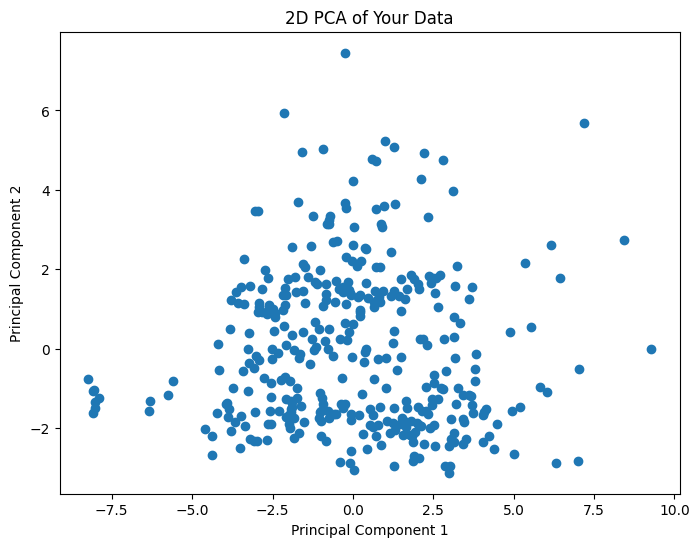

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_df[0], principal_df[1])#principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Your Data')
plt.show()


In [25]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component: {explained_variance}")


Explained Variance by Component: [0.14168038 0.06952025 0.06100271 0.04846343 0.03691934 0.03272282
 0.03111556 0.02984509 0.02808234 0.02731354 0.02621629 0.02494321
 0.02264444 0.02214157 0.02122416 0.02012644 0.01925317 0.018699
 0.0182416  0.01793453 0.01758003 0.01686616 0.01660798 0.01619696
 0.0156672  0.01466741 0.0140082  0.01362441 0.01275694 0.0123566 ]


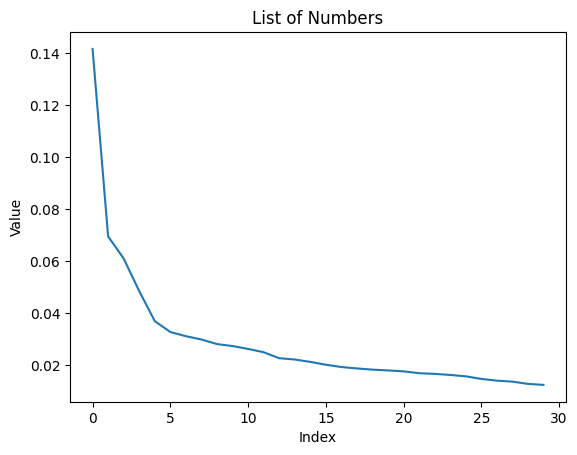

In [26]:
plt.plot(explained_variance)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('List of Numbers')
plt.show()

Elbow point is at index 4 with value 0.03691933682595951


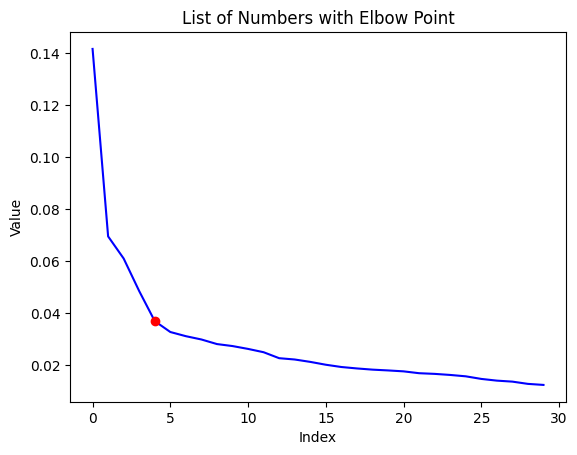

In [27]:
import numpy as np

# Calculate the distance of each point from the line connecting the first and last points
first_point = [0, explained_variance[0]]
last_point = [len(explained_variance)-1, explained_variance[-1]]

line_vector = np.subtract(last_point, first_point)
line_length = np.linalg.norm(line_vector)

distances = []
for i, num in enumerate(explained_variance):
    point = [i, num]
    triangle_height = np.linalg.norm(np.cross(np.subtract(last_point, first_point), np.subtract(first_point, point))) / line_length
    distances.append(triangle_height)

# The index of the maximum distance is the elbow point
elbow_index = np.argmax(distances)
elbow_value = explained_variance[elbow_index]

print(f"Elbow point is at index {elbow_index} with value {elbow_value}")

# Plotting the list with the elbow point highlighted
plt.plot(explained_variance, 'b-')
plt.plot(elbow_index, elbow_value, 'ro')  # Elbow point in red
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('List of Numbers with Elbow Point')
plt.show()


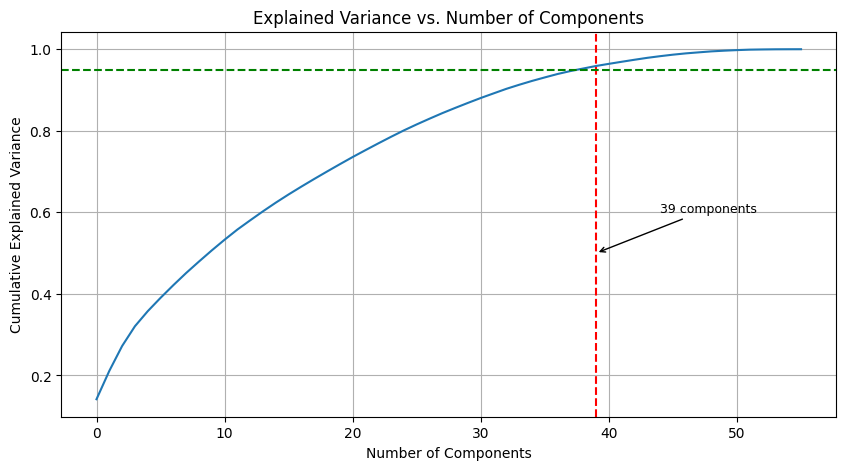

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your standardized data
pca = PCA().fit(x)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because Python uses 0-based indexing

# Plotting the explained variance
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axvline(x=num_components, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.grid(True)

# Annotate the number of components
plt.annotate(f'{num_components} components', xy=(num_components, 0.5), xytext=(num_components+5, 0.6),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=9)

plt.show()


In [34]:
from sklearn.decomposition import PCA

# Assuming X is your standardized data
pca_39 = PCA(n_components=39)
principal_components_39 = pca_39.fit_transform(x)

# Convert to DataFrame for easier handling (optional)
df_pca_39 = pd.DataFrame(data=principal_components_39, columns=[f'PC{i+1}' for i in range(39)])


In [38]:
components_39 = pd.DataFrame(pca_39.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(39)])
# print(components_39)


In [44]:
# Extract the explained variance of each component
explained_variance_39 = pca_39.explained_variance_ratio_

# Convert to DataFrame for easier visualization
df_variance_39 = pd.DataFrame({'Component': [f'PC{i+1}' for i in range(39)],
                               'Explained Variance': explained_variance_39})

print(df_variance_39)


   Component  Explained Variance
0        PC1            0.141680
1        PC2            0.069520
2        PC3            0.061003
3        PC4            0.048463
4        PC5            0.036919
5        PC6            0.032723
6        PC7            0.031116
7        PC8            0.029845
8        PC9            0.028082
9       PC10            0.027314
10      PC11            0.026216
11      PC12            0.024943
12      PC13            0.022644
13      PC14            0.022142
14      PC15            0.021224
15      PC16            0.020126
16      PC17            0.019253
17      PC18            0.018699
18      PC19            0.018242
19      PC20            0.017935
20      PC21            0.017580
21      PC22            0.016866
22      PC23            0.016608
23      PC24            0.016197
24      PC25            0.015667
25      PC26            0.014667
26      PC27            0.014008
27      PC28            0.013624
28      PC29            0.012757
29      PC

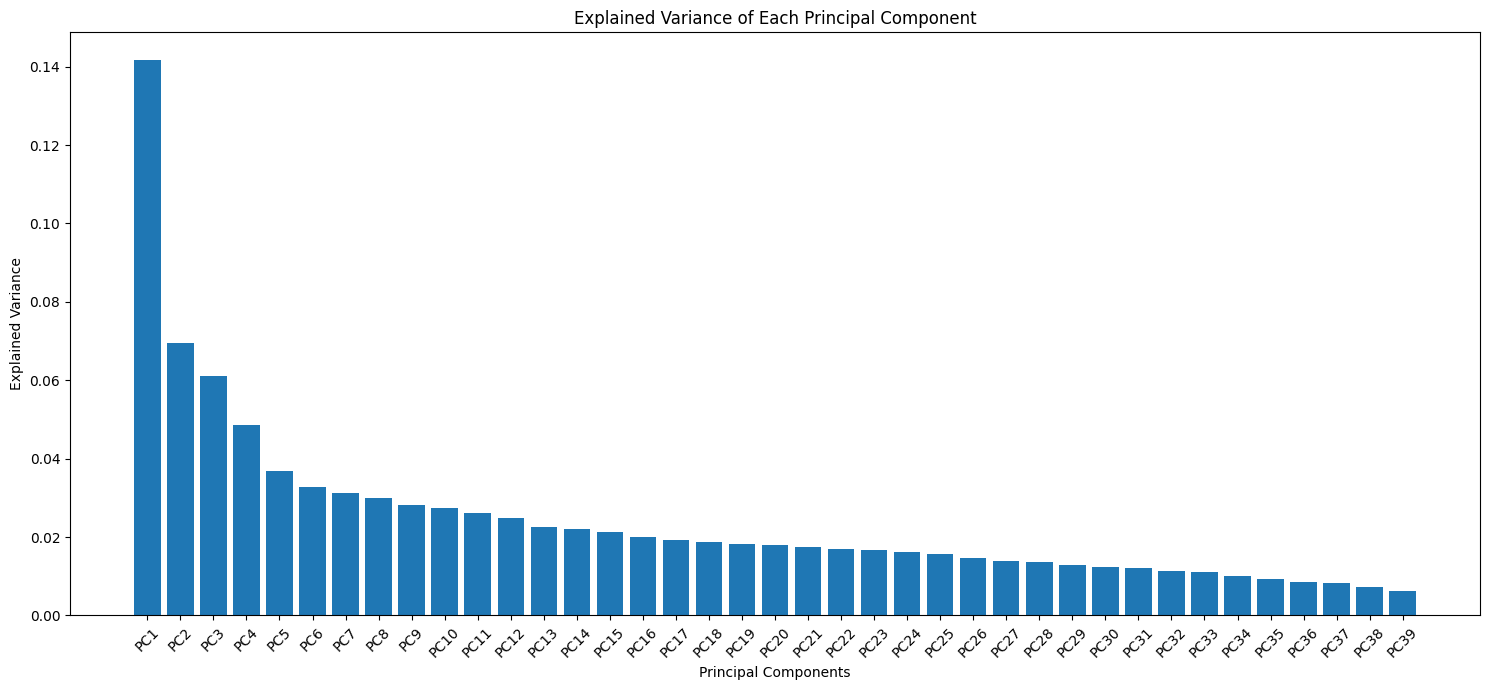

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.bar(df_variance_39['Component'], df_variance_39['Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Each Principal Component')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


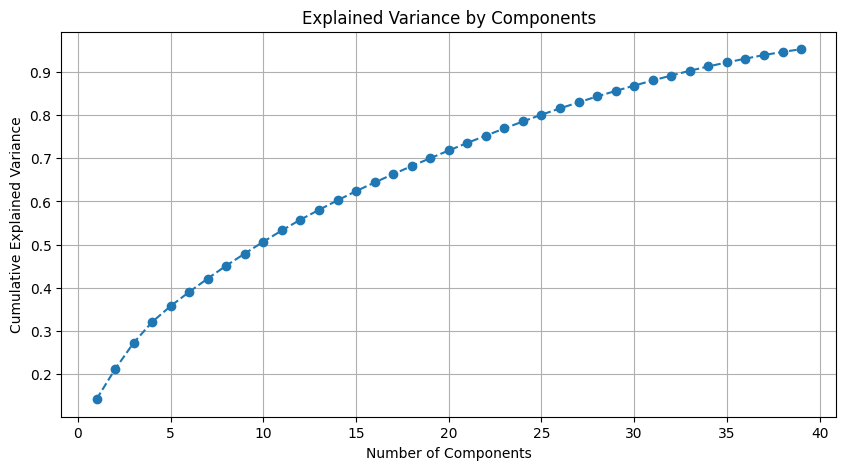

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming pca is a PCA object you've already fitted on your data
explained_variance = pca_39.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


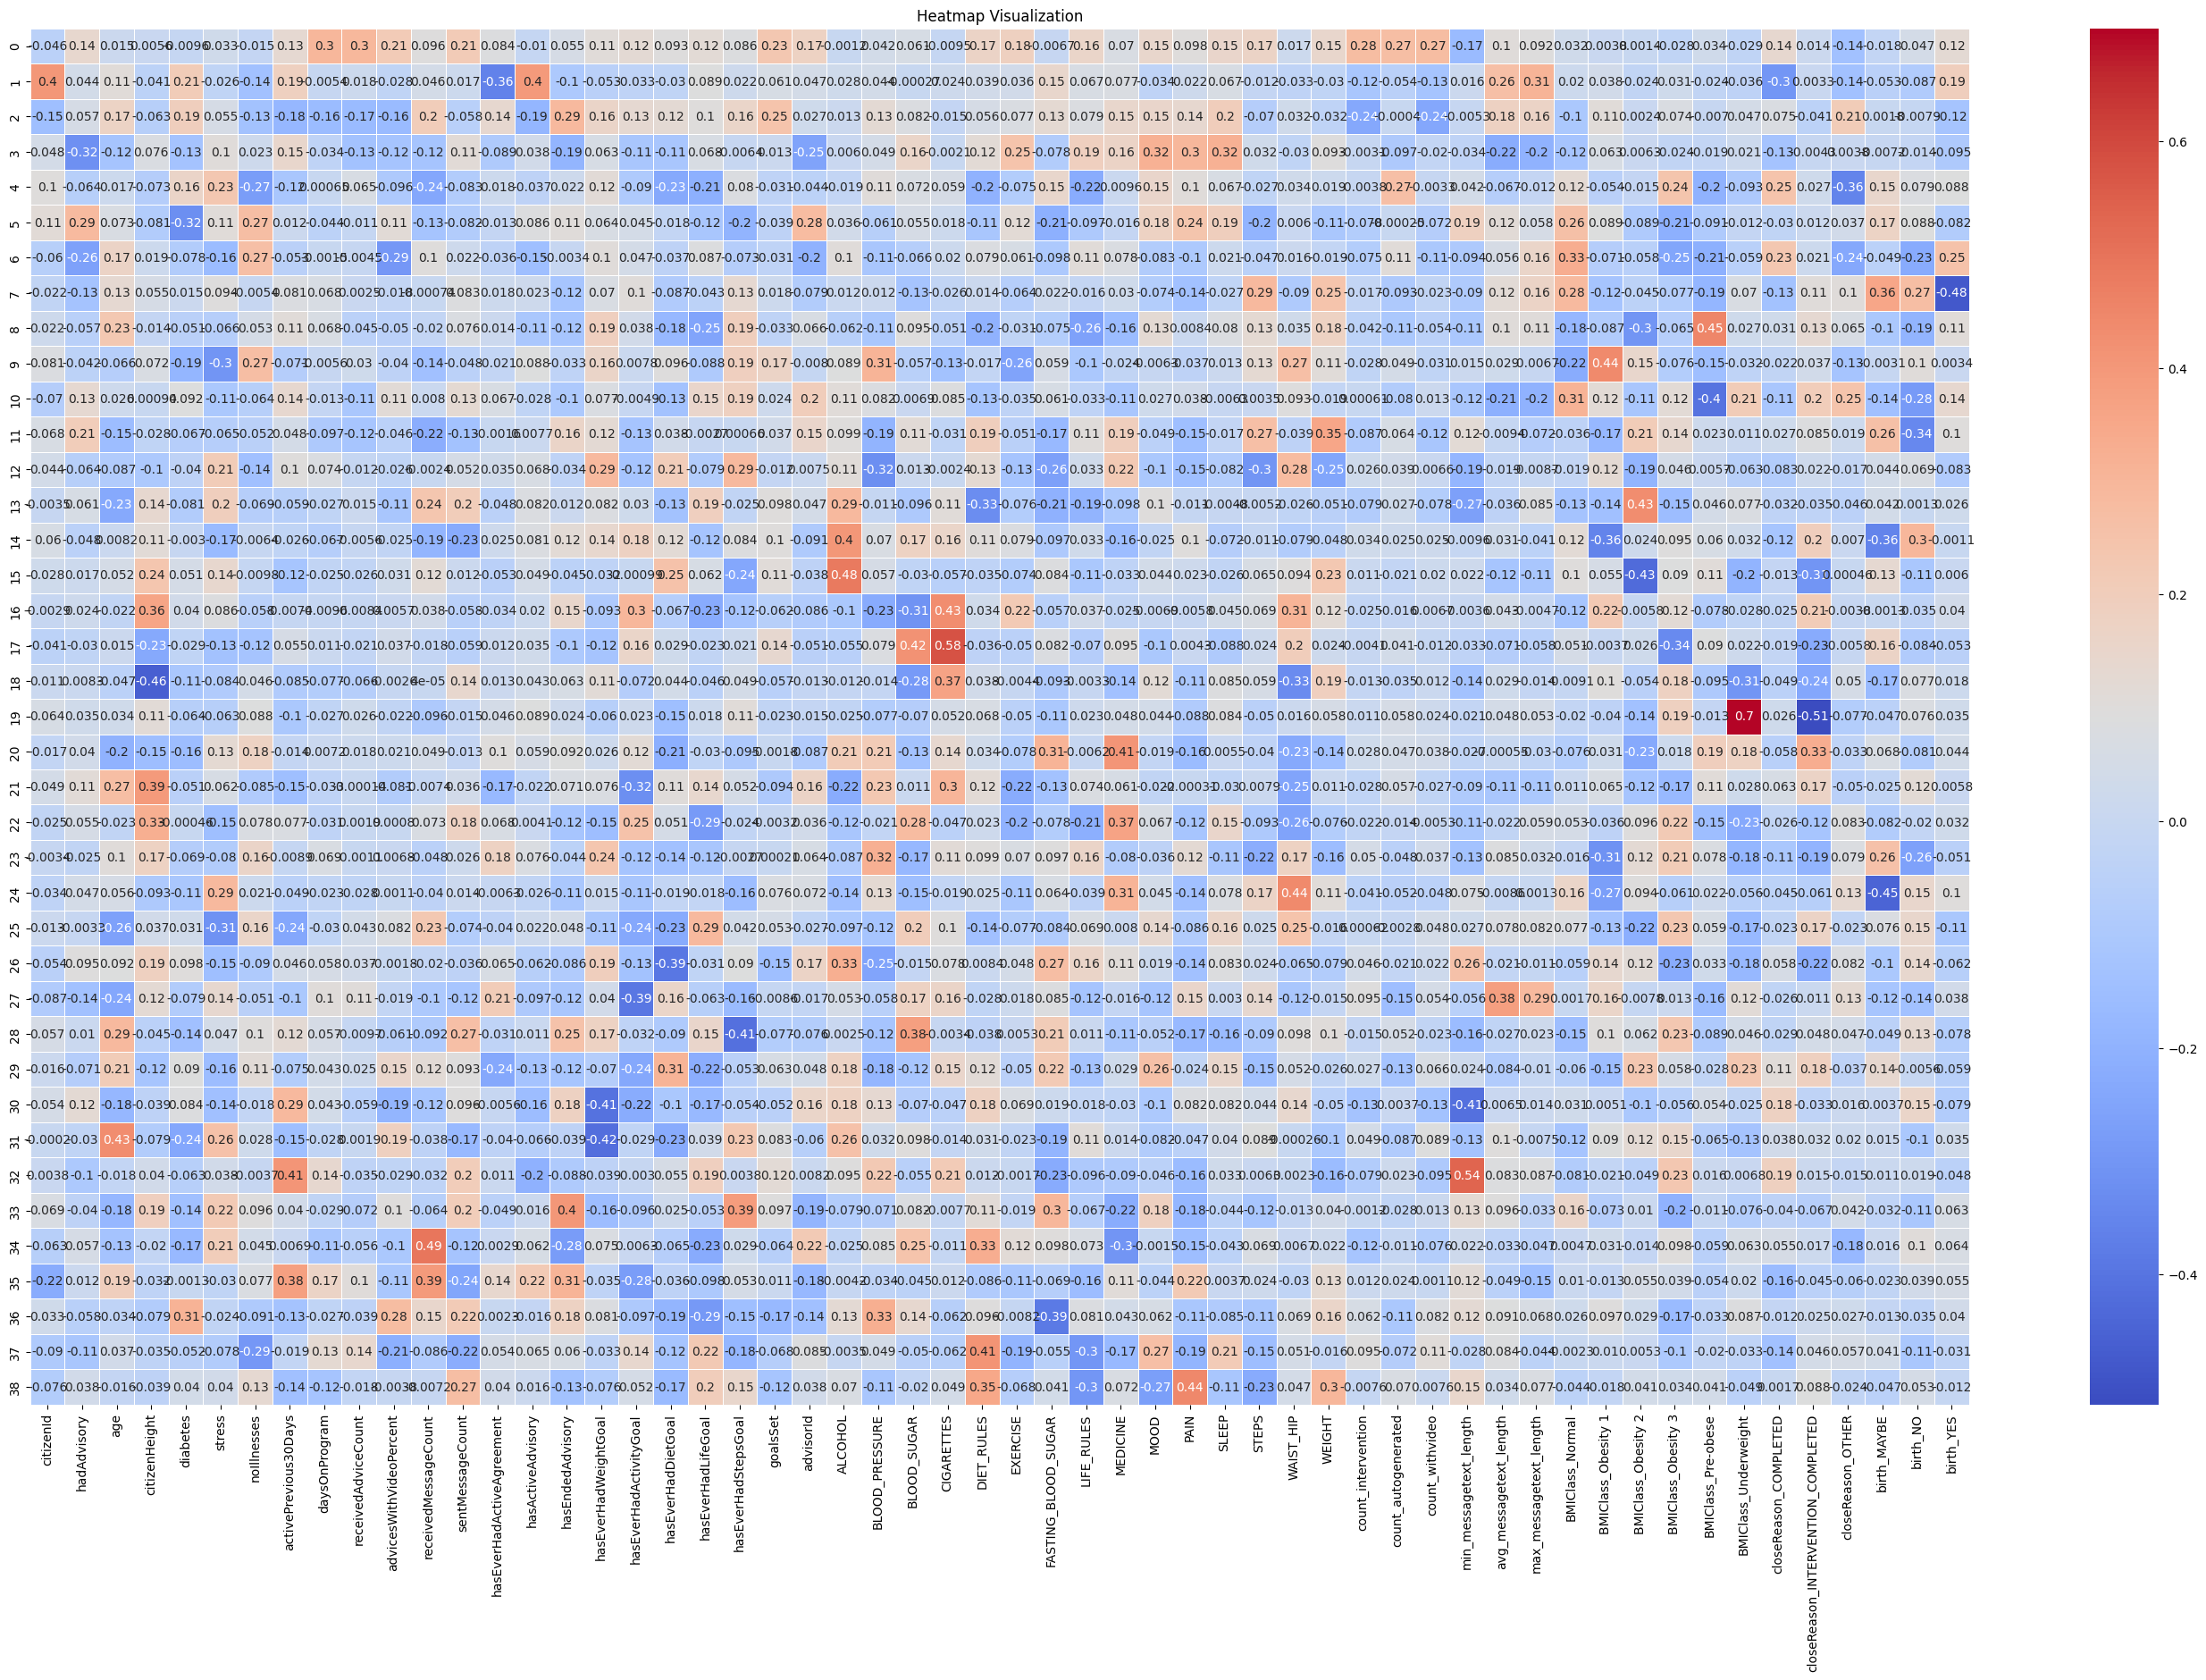

In [60]:
# components_39.set_index('index', inplace=True)

# Plot the heatmap
plt.figure(figsize=(35, 20))
sns.heatmap(components_39, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Visualization')
plt.show()

In [59]:
import pandas as pd
import numpy as np

# Assuming pca_39 is the PCA object you've already fitted on your data
components_39 = pd.DataFrame(pca_39.components_, columns=df.columns)

# Compute the absolute maximum loading for each feature across all components
max_loadings = components_39.abs().max(axis=0)

# Set a threshold. For example, if the maximum absolute loading for a feature is below 0.1,
# it might be considered to have a low contribution. Adjust this value based on your needs.
threshold = 0.27
low_contribution_features = max_loadings[max_loadings < threshold].index.tolist()

print("Features with low contribution across all principal components:")
print(len(low_contribution_features))
print(low_contribution_features)


Features with low contribution across all principal components:
2
['goalsSet', 'EXERCISE']
